In [55]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

In [56]:
df=pd.read_csv('gaming_with_cluster.csv')

In [57]:
df.head()

,Participants,Age,mean_hours_gaming/week,period_considered_as_gamer,insomnia (with the Insomnia Severity Index),excessive daytime sleepiness,anxiety,Depression,Platform,cluster
0,h,18,20,29,6,6,8,8,Smartphone,1
1,h,22,9,36,5,4,4,4,Smartphone,1
2,h,17,21,25,6,7,4,4,Smartphone,1
3,h,29,23,31,12,14,10,4,Smartphone,0
4,h,23,18,24,5,5,4,6,Smartphone,1


In [59]:
df['Platform'].value_counts()

Smartphone    100
Computer       94
Console        81
Tablet         26
Name: Platform, dtype: int64

In [58]:
df.drop('Participants',1,inplace=True)

In [64]:
df['Platform']=df['Platform'].map({'Smartphone':1,'Computer':2,'Console':3,'Tablet':4})

In [65]:
df_=df.copy()

In [66]:
X=df_.drop('cluster',1)

In [67]:
y=df_['cluster']

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,stratify=y,random_state=100)

In [69]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(210, 8)
(91, 8)
(210,)
(91,)


In [73]:
rf=RandomForestClassifier()

In [74]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [75]:
from sklearn.metrics import plot_roc_curve


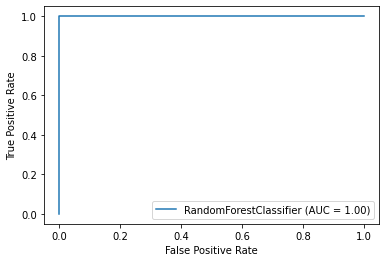

In [77]:
plot_roc_curve(rf,X_train,y_train)

In [79]:
y_test_predicted=rf.predict(X_test)

In [80]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV

In [81]:
print('accuracy:{}, precsison:{}, recall:{} '.format(accuracy_score(y_test,y_test_predicted),
                                                     precision_score(y_test,y_test_predicted),
                                                    recall_score(y_test,y_test_predicted)))

accuracy:1.0, precsison:1.0, recall:1.0 


In [83]:
rf_=RandomForestClassifier()

In [82]:
params=[
   
{'max_depth':[2,5,8,10,15,20],
 'min_samples_split':[10,20,50,100,500],
 'min_samples_leaf':[10,20,50,100,500],
  'n_estimators':[20,80,100,150]
    }
    
    
]

In [84]:
gcv=GridSearchCV(rf_,params,cv=3,verbose=50,n_jobs=-1)

In [85]:
gcv.fit(X_train,y_train)

Fitting 3 folds for each of 600 candidates, totalling 1800 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   54.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   55.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   55.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   56.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   56.3s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 131 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Paralle

[Parallel(n_jobs=-1)]: Done 265 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 267 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 269 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 271 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.0min
[Paralle

[Parallel(n_jobs=-1)]: Done 398 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 399 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 400 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 401 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 403 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 404 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 405 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 406 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 407 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 409 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 411 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 413 tasks      | elapsed:  2.5min
[Paralle

[Parallel(n_jobs=-1)]: Done 531 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 532 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 533 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 534 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 535 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 537 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 538 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 539 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 541 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 542 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 543 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 544 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 545 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 546 tasks      | elapsed:  3.0min
[Paralle

[Parallel(n_jobs=-1)]: Done 664 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 665 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 666 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 667 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 669 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 670 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 671 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 673 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 674 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 675 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 676 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 677 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 678 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 679 tasks      | elapsed:  3.5min
[Paralle

[Parallel(n_jobs=-1)]: Done 798 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 799 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 800 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 801 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 802 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 803 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 804 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 805 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 806 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 807 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 809 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 810 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 811 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 813 tasks      | elapsed:  4.0min
[Paralle

[Parallel(n_jobs=-1)]: Done 931 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 932 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 933 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 934 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 935 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 936 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 937 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 938 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 939 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 940 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 941 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 942 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 943 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 944 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 945 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 946 tasks      | elapsed:  4.5min
[Paralle

[Parallel(n_jobs=-1)]: Done 1063 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1064 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1065 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1066 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1067 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1068 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1069 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1070 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1071 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1072 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 1073 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 1074 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 1075 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 1076 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 1077 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 1078 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1194 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1195 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1196 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1197 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1198 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1199 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1201 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1203 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1204 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1205 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1206 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1207 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1208 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1209 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1326 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1327 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1328 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1329 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1330 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1331 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1332 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1333 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1334 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1335 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1336 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1337 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1338 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1339 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1340 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1341 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1458 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1459 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1460 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1461 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1462 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1463 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1464 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1465 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1466 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1467 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1468 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1469 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1470 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1471 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1472 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1473 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1590 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1591 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1592 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1593 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1594 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1595 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1596 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1597 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1598 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1599 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1600 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1601 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1602 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1603 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1604 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1605 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1722 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 1723 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 1724 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 1725 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 1726 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 1727 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 1728 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 1729 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 1730 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 1731 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 1732 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 1733 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 1734 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 1735 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 1736 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 1737 tasks      | elapsed: 

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'max_depth': [2, 5, 8, 10, 15, 20],
                          'min_samples_leaf': [10, 20, 50, 100, 500],
                          'min_samples_split': [10, 20, 50, 100, 500],
                          'n_estimators': [20, 80, 100, 150]}],
             verbose=50)

In [87]:
rf_final=gcv.best_estimator_

In [89]:
rf_final.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=10)

In [92]:
y_test_predicted=rf_final.predict(X_test)

In [93]:
print('accuracy:{}, precsison:{}, recall:{} '.format(accuracy_score(y_test,y_test_predicted),
                                                     precision_score(y_test,y_test_predicted),
                                                    recall_score(y_test,y_test_predicted)))

accuracy:1.0, precsison:1.0, recall:1.0 


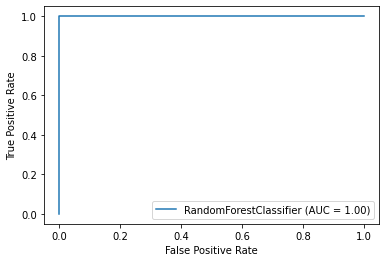

In [94]:
plot_roc_curve(rf_final,X_train,y_train)

In [96]:
from sklearn.model_selection import cross_val_score
scoresxgb = cross_val_score(rf_final,X_train,y_train,cv=10,scoring='accuracy')
print(scoresxgb)

[1.        1.        1.        1.        1.        1.        1.
 0.9047619 1.        1.       ]


In [97]:
import numpy as np
print("Average accuracy of the model")
print(np.mean(scoresxgb))
print("SD of the model")
print(np.std(scoresxgb))

Average accuracy of the model
0.9904761904761905
SD of the model
0.02857142857142857


In [98]:
#Estimate Confidence Interval of accuracy
import scipy.stats as stats
n=10
xbar = np.mean(scoresxgb)
s = np.std(scoresxgb)
se = s/np.sqrt(n)
stats.t.interval(0.95,df=n-1,loc=xbar,scale=se)

(0.9700374217346884, 1.0109149592176925)

In [99]:
import pickle

In [100]:
file=open('game_affecting_model.pkl','wb')
pickle.dump(pipe_xgb_,file)

In [35]:
X_test.head()

,Age,mean_hours_gaming/week,period_considered_as_gamer,insomnia (with the Insomnia Severity Index),excessive daytime sleepiness,anxiety,Depression,Platform_Computer,Platform_Console,Platform_Smartphone
123,35,21,31,7,4,4,8,0,0,1
144,35,19,40,12,10,8,4,0,1,0
229,18,24,17,14,14,10,6,0,1,0
141,21,22,28,6,5,8,5,1,0,0
28,18,20,15,6,8,4,5,0,1,0
